In [2]:
import pandas as pd

## Get the one-time result

In [3]:
ldname = ['adult', 'balanced_credit_card', 'unbalanced_credit_card', 'encoded_adult']
lmname =['GaussianCopula', 'CTGAN', 'CopulaGAN', 'TVAE']
dfres = pd.DataFrame()
outpath = "../data/output/ES10HP/"
for m_name in ldname:
    for method_name in lmname:
        fname = outpath + m_name + "_" + method_name + "_clf_best_param_xgboost.csv"
        if not os.path.exists(fname):
            print(f"File '{fname}' does not exist. Skipping...")
            continue
        df = pd.read_csv(fname, index_col=0)
        ltuned = [df.loc['tuned_val_roc', 'Value'], df.loc['tuned_test_roc', 'Value']]
        luntuned = [df.loc['untuned_val_roc', 'Value'], df.loc['untuned_test_roc', 'Value']]
        lmodel =[method_name, method_name]
        ldata = [m_name, m_name]
        lset = ['val', 'test']
        dfres = pd.concat([dfres, pd.DataFrame([ldata, lmodel, lset, luntuned, ltuned],
                index = ['data', 'model', 'set', 'untuned', 'tuned']).T])

    for t in ['tuned', 'untuned']:
        fname = outpath + m_name + "_" + t + '_' +  "models_clf_best_param_xgboost.csv"
        if not os.path.exists(fname):
            print(f"File '{fname}' does not exist. Skipping...")
            continue
        df = pd.read_csv(fname, index_col=0)
        
        if t == 'tuned':
            ltuned = [df['val_roc'], df['test_roc']]
        else:
            luntuned = [df['val_roc'], df['test_roc']]
    lmodel =['SC-GOAT', 'SC_GOAT']
    ldata = [m_name, m_name]
    lset = ['val', 'test']
    dfres = pd.concat([dfres, pd.DataFrame([ldata, lmodel, lset, luntuned, ltuned],
            index = ['data', 'model', 'set', 'untuned', 'tuned']).T])


File '../data/output/ES10HP/adult_tuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/adult_untuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/balanced_credit_card_tuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/balanced_credit_card_untuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/unbalanced_credit_card_tuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/unbalanced_credit_card_untuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/encoded_adult_tuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...
File '../data/output/ES10HP/encoded_adult_untuned_models_clf_best_param_xgboost.csv' does not exist. Skipping...


In [4]:
dfres.tuned = dfres.tuned.astype(float)
dfres.untuned = dfres.untuned.astype(float)
dfres['diff'] = dfres['tuned'] - dfres['untuned']
dfres.loc[dfres.set == 'test', ]
# dfres

,data,model,set,untuned,tuned,diff
1,adult,GaussianCopula,test,0.762358,0.762358,0.000000
1,adult,CTGAN,test,0.819527,0.857481,0.037955
1,adult,CopulaGAN,test,0.804897,0.832501,0.027603
1,adult,TVAE,test,0.848737,0.854666,0.005929
1,adult,SC_GOAT,test,0.848737,0.854666,0.005929
1,balanced_credit_card,GaussianCopula,test,0.931923,0.931923,0.000000
1,balanced_credit_card,CTGAN,test,0.944432,0.964681,0.020249
1,balanced_credit_card,CopulaGAN,test,0.954567,0.962612,0.008045
1,balanced_credit_card,TVAE,test,0.986016,0.986016,0.000000
1,balanced_credit_card,SC_GOAT,test,0.986016,0.986016,0.000000


## Get the Experiments

In [5]:
os.getcwd()

'/gpfs/gibbs/project/sekhon/sn576/Bayesian_Synthesizer/code'

In [6]:
ldname = ['adult', 'encoded_adult', 'credit_card_balanced50k', 'credit_card_unbalanced50k']
ldataname = ['adult', 'encoded_adult', 'balanced_credit_card', 'unbalanced_credit_card']
ldict = {k: v for k, v in zip(ldname, ldataname)}
lres = []
for d in ldname:
    dfCTGP = pd.read_csv('../CTAB-GAN-Plus/Experiments/' + d + '_CTABGAN_Result.csv')
    dfCTGP.rename(columns={'Unnamed: 0': 'experiment'}, inplace=True)
    dfCTGP['data'] = ldict[d]
    dfCTGP['method'] = 'CTabGANPlus'
    dfCTGP['untuned_val_auc'] = dfCTGP['AUC']
    dfCTGP['tuned_val_auc'] = dfCTGP['AUC']
    dfCTGP['untuned_test_auc'] = dfCTGP['AUC']
    dfCTGP['tuned_test_auc'] = dfCTGP['AUC']
    lres.append(dfCTGP)

dfCTab = pd.concat(lres, ignore_index=True)
dfCTab

,experiment,AUC,time,data,method,untuned_val_auc,tuned_val_auc,untuned_test_auc,tuned_test_auc
0,0,0.789306,1067.693750,adult,CTabGANPlus,0.789306,0.789306,0.789306,0.789306
1,1,0.858982,1068.925862,adult,CTabGANPlus,0.858982,0.858982,0.858982,0.858982
2,2,0.846320,1068.904680,adult,CTabGANPlus,0.846320,0.846320,0.846320,0.846320
3,3,0.871311,1068.354874,adult,CTabGANPlus,0.871311,0.871311,0.871311,0.871311
4,4,0.858785,1070.310633,adult,CTabGANPlus,0.858785,0.858785,0.858785,0.858785
5,5,0.804403,1068.637221,adult,CTabGANPlus,0.804403,0.804403,0.804403,0.804403
6,6,0.863021,1068.112773,adult,CTabGANPlus,0.863021,0.863021,0.863021,0.863021
7,7,0.841734,1072.112877,adult,CTabGANPlus,0.841734,0.841734,0.841734,0.841734
8,8,0.793299,1065.189170,adult,CTabGANPlus,0.793299,0.793299,0.793299,0.793299
9,9,0.797388,1064.098274,adult,CTabGANPlus,0.797388,0.797388,0.797388,0.797388


In [7]:
ldname = ['adult', 'balanced_credit_card', 'unbalanced_credit_card', 'encoded_adult']

dfres = pd.DataFrame()
outpath = "../data/outputDataAugmentation/"
lres = []
n_exp = 10
for exp in range(n_exp):
    for data in ldname:
        fname = outpath + 'experiment' + str(exp) + "_" + data + "_val_test_auc.csv"
        if not os.path.exists(fname):
            print(f"File '{fname}' does not exist. Skipping...")
            continue
        df = pd.read_csv(fname)
        df['data'] = data
        res = lres.append(df)
lres.append(dfCTab.loc[:, df.columns])
dfF = pd.concat(lres, ignore_index=True)
dfF

,data,method,untuned_val_auc,tuned_val_auc,untuned_test_auc,tuned_test_auc,experiment
0,adult,GaussianCopula,0.786819,0.786819,0.784212,0.784212,0
1,adult,CTGAN,0.871739,0.863807,0.869059,0.862618,0
2,adult,CopulaGAN,0.776159,0.797041,0.778475,0.795788,0
3,adult,TVAE,0.836208,0.832983,0.836237,0.826964,0
4,adult,SC-GOAT,0.892305,0.888543,0.893281,0.884764,0
...,...,...,...,...,...,...,...
235,unbalanced_credit_card,CTabGANPlus,0.997031,0.997031,0.997031,0.997031,5
236,unbalanced_credit_card,CTabGANPlus,0.983295,0.983295,0.983295,0.983295,6
237,unbalanced_credit_card,CTabGANPlus,0.973284,0.973284,0.973284,0.973284,7
238,unbalanced_credit_card,CTabGANPlus,0.843675,0.843675,0.843675,0.843675,8


In [8]:
dfF.loc[(dfF['method'] == 'TVAE') & (dfF['data'] == 'balanced_credit_card'), ['untuned_test_auc', 'tuned_test_auc', 'experiment']]

dfF['diff'] = dfF['tuned_test_auc'] - dfF['untuned_test_auc']
dftemp = dfF.groupby(['data', 'experiment'])['diff'].mean().reset_index()

dftemp
dftemp = dftemp.sort_values(by = 'diff')
dftemp.groupby(["data"]).apply(lambda x: x.nsmallest(5, 'diff'))

data  experiment      diff
data                                                                   
adult                  9                    adult           9 -0.004518
                       2                    adult           2 -0.002520
                       1                    adult           1 -0.002408
                       6                    adult           6 -0.002358
                       0                    adult           0 -0.001153
balanced_credit_card   17    balanced_credit_card           7 -0.002095
                       15    balanced_credit_card           5 -0.000917
                       12    balanced_credit_card           2 -0.000439
                       16    balanced_credit_card           6  0.000011
                       14    balanced_credit_card           4  0.000093
encoded_adult          21           encoded_adult           1 -0.003276
                       24           encoded_adult           4 -0.000183
                       22           encoded_adult           2  0.000917
                       23           encoded_adult           3  0.003923
                       26           encoded_adult           6  0.008443
unbalanced_credit_card 32  unbalanced_credit_card           2 -0.008110
                       31  unbalanced_credit_card           1 -0.004760
                       30  unbalanced_credit_card           0 -0.000598
                       37  unbalanced_credit_card           7 -0.000505
                       33  unbalanced_credit_card           3 -0.000340

In [9]:
agg_functions = {
    'untuned_val_auc':['mean', 'std', 'min', 'max'],
    'tuned_val_auc':['mean', 'std', 'min', 'max'],
    'untuned_test_auc':['mean', 'std', 'min', 'max'],
    'tuned_test_auc':['mean', 'std', 'min', 'max']
}
dfF.groupby(['data', 'method']).agg(agg_functions)

untuned_val_auc                      \
                                                 mean       std       min   
data                   method                                               
adult                  CTGAN                 0.846809  0.014139  0.829581   
                       CTabGANPlus           0.832455  0.032542  0.789306   
                       CopulaGAN             0.793073  0.033198  0.717802   
                       GaussianCopula        0.768677  0.025360  0.731311   
                       SC-GOAT               0.886733  0.004191  0.878415   
                       TVAE                  0.833353  0.009476  0.819670   
balanced_credit_card   CTGAN                 0.952529  0.007301  0.942546   
                       CTabGANPlus           0.980394  0.004368  0.971551   
                       CopulaGAN             0.956721  0.003074  0.952137   
                       GaussianCopula        0.942493  0.009339  0.925485   
                       SC-GOAT               0.978834  0.002024  0.975346   
                       TVAE                  0.985455  0.002309  0.981365   
encoded_adult          CTGAN                 0.753882  0.037827  0.716474   
                       CTabGANPlus           0.818120  0.030590  0.755713   
                       CopulaGAN             0.686391  0.065860  0.574860   
                       GaussianCopula        0.791893  0.038359  0.706210   
                       SC-GOAT               0.877378  0.006485  0.866395   
                       TVAE                  0.810926  0.029828  0.760100   
unbalanced_credit_card CTGAN                 0.500000  0.000000  0.500000   
                       CTabGANPlus           0.967033  0.050693  0.843675   
                       CopulaGAN             0.500000  0.000000  0.500000   
                       GaussianCopula        0.950839  0.036332  0.862076   
                       SC-GOAT               0.964282  0.025552  0.909243   
                       TVAE                  0.500000  0.000000  0.500000   

                                                tuned_val_auc            \
                                            max          mean       std   
data                   method                                             
adult                  CTGAN           0.871739      0.847277  0.011885   
                       CTabGANPlus     0.871311      0.832455  0.032542   
                       CopulaGAN       0.831039      0.815735  0.018309   
                       GaussianCopula  0.801593      0.768677  0.025360   
                       SC-GOAT         0.892305      0.887578  0.003916   
                       TVAE            0.848629      0.822670  0.024556   
balanced_credit_card   CTGAN           0.964258      0.957776  0.006539   
                       CTabGANPlus     0.986697      0.980394  0.004368   
                       CopulaGAN       0.961555      0.957607  0.004567   
                       GaussianCopula  0.955512      0.942493  0.009339   
                       SC-GOAT         0.982562      0.978694  0.002149   
                       TVAE            0.988660      0.983703  0.002025   
encoded_adult          CTGAN           0.823376      0.789768  0.034303   
                       CTabGANPlus     0.856019      0.818120  0.030590   
                       CopulaGAN       0.775715      0.724764  0.058262   
                       GaussianCopula  0.832292      0.791893  0.038359   
                       SC-GOAT         0.884617      0.875572  0.009669   
                       TVAE            0.846519      0.821852  0.020599   
unbalanced_credit_card CTGAN           0.500000      0.500000  0.000000   
                       CTabGANPlus     0.997031      0.967033  0.050693   
                       CopulaGAN       0.500000      0.500000  0.000000   
                       GaussianCopula  0.988819      0.950839  0.036332   
                       SC-GOAT         0.992359      0.976777  0.027866   
        

In [10]:
dfFinal = dfF.groupby(['data', 'method']).agg({
    'untuned_val_auc': ['mean', 'std'], 'tuned_val_auc': ['mean', 'std'],
    'untuned_test_auc': ['mean', 'std'], 'tuned_test_auc': ['mean', 'std'],
    }).reset_index()

def round_if_numeric(value):
    if isinstance(value, (int, float)):
        return round(value, 4)  # You can adjust the number of decimal places here
    return value

# Apply the round_if_numeric function to the whole DataFrame
dfFinal = dfFinal.applymap(round_if_numeric)
custom_order = ['GaussianCopula', 'CTGAN', 'CopulaGAN', "TVAE", 'CTabGANPlus', 'SC-GOAT']
dfFinal['method'] = pd.Categorical(dfFinal['method'], categories=custom_order, ordered=True)
dfFinal = dfFinal.sort_values(by=['data', 'method'])
df_tauc = dfFinal[['data', 'method', 'untuned_test_auc', 'tuned_test_auc']]

df_tauc.columns = df_tauc.columns.map('_'.join).str.strip('_')

df_tauc.to_csv("../Results/test_auc_experiments.csv", index=False)
df_tauc


,data,method,untuned_test_auc_mean,untuned_test_auc_std,tuned_test_auc_mean,tuned_test_auc_std
3,adult,GaussianCopula,0.7704,0.0337,0.7704,0.0337
0,adult,CTGAN,0.8479,0.0126,0.8479,0.0068
2,adult,CopulaGAN,0.7929,0.0272,0.8161,0.0226
5,adult,TVAE,0.8400,0.0120,0.8325,0.0163
1,adult,CTabGANPlus,0.8325,0.0325,0.8325,0.0325
4,adult,SC-GOAT,0.8863,0.0047,0.8865,0.0060
9,balanced_credit_card,GaussianCopula,0.9431,0.0093,0.9431,0.0093
6,balanced_credit_card,CTGAN,0.9535,0.0064,0.9590,0.0054
8,balanced_credit_card,CopulaGAN,0.9563,0.0045,0.9573,0.0078
11,balanced_credit_card,TVAE,0.9860,0.0020,0.9843,0.0025


In [11]:
import pandas as pd
from scipy.stats import ttest_ind

# Define the groups for comparison
lmname =['GaussianCopula', 'CTGAN', 'CopulaGAN', 'TVAE', 'CTabGANPlus']
# Perform one-sided t-test for each combination of columns in different groups
lres = []
for data in ldname:
    for method in lmname:
        scgoat_u = dfF.loc[(dfF['method'] == 'SC-GOAT') & (dfF['data'] == data), 'untuned_test_auc'].tolist()
        testing_u = dfF.loc[(dfF['method'] == method) & (dfF['data'] == data), 'untuned_test_auc'].tolist()
        scgoat_t = dfF.loc[(dfF['method'] == 'SC-GOAT') & (dfF['data'] == data), 'tuned_test_auc'].tolist()
        testing_t = dfF.loc[(dfF['method'] == method) & (dfF['data'] == data), 'tuned_test_auc'].tolist()
        t_stat_u, p_value_u = ttest_ind(scgoat_u, testing_u, alternative='greater')
        t_stat_t, p_value_t = ttest_ind(scgoat_t, testing_t, alternative='greater')
        lres.append([data, method, t_stat_u, round(p_value_u, 4), t_stat_t, round(p_value_t, 4)])
dft = pd.DataFrame(lres, columns=['data', 'method', 'untuned:tstat', 'untuned:pvalue', 'tuned:tstat', 'tuned:pvalue'])

custom_order = ['GaussianCopula', 'CTGAN', 'CopulaGAN', "TVAE", 'CTabGANPlus', 'SC-GOAT']
dft['method'] = pd.Categorical(dft['method'], categories=custom_order, ordered=True)
dft = dft.sort_values(by=['data', 'method'])
dft.to_csv("../Results/t-test.csv", index=False)

/gpfs/gibbs/project/sekhon/sn576/conda_envs/sdv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [12]:
dfR = df_tauc.merge(dft, on = ['data', 'method'], how = 'left')
dfR.to_csv("../Results/t-test_test_auc.csv", index=False)

## Barchart

In [13]:
dfFinal.loc[dfFinal['data'] == 'adult', ('tuned_test_auc', 'mean')].to_list()

[0.7704, 0.8479, 0.8161, 0.8325, 0.8325, 0.8865]

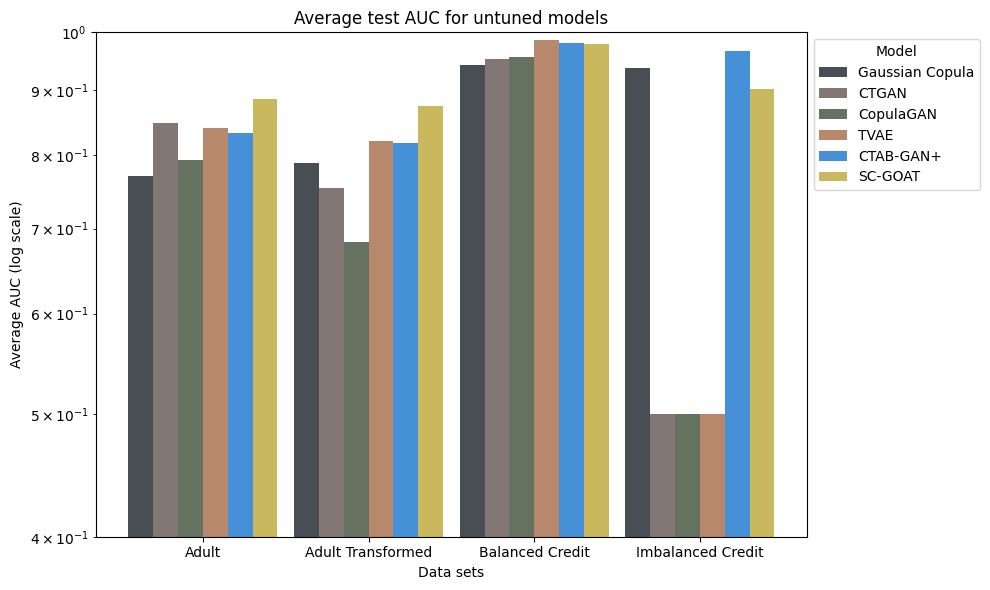

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace this with your actual data)
datasets = ['Adult', 'Adult Transformed', 'Balanced Credit', 'Imbalanced Credit']

# groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
groups = datasets
methods = ['Gaussian Copula', 'CTGAN', 'CopulaGAN', 'TVAE', 'CTAB-GAN+', 'SC-GOAT']

# subgroups = ['Subgroup 1', 'Subgroup 2', 'Subgroup 3', 'Subgroup 4', 'Subgroup 5']
subgroups = methods

adult_results_u = dfFinal.loc[dfFinal['data'] == 'adult', ('untuned_test_auc', 'mean')].to_list()
encoded_adult_results_u = dfFinal.loc[dfFinal['data'] == 'encoded_adult', ('untuned_test_auc', 'mean')].to_list()
balanced_credit_results_u = dfFinal.loc[dfFinal['data'] == 'balanced_credit_card', ('untuned_test_auc', 'mean')].to_list()
imbalanced_credit_results_u = dfFinal.loc[dfFinal['data'] == 'unbalanced_credit_card', ('untuned_test_auc', 'mean')].to_list()

adult_results_t = dfFinal.loc[dfFinal['data'] == 'adult', ('tuned_test_auc', 'mean')].to_list()
encoded_adult_results_t = dfFinal.loc[dfFinal['data'] == 'encoded_adult', ('tuned_test_auc', 'mean')].to_list()
balanced_credit_results_t = dfFinal.loc[dfFinal['data'] == 'balanced_credit_card', ('tuned_test_auc', 'mean')].to_list()
imbalanced_credit_results_t = dfFinal.loc[dfFinal['data'] == 'unbalanced_credit_card', ('tuned_test_auc', 'mean')].to_list()

data_u = [
    adult_results_u,  # Adult
    encoded_adult_results_u,  # Adult Transformed
    balanced_credit_results_u,   # Balanced Credit
    imbalanced_credit_results_u   # Imbalanced Credi
]

data_t = [
    adult_results_t,  # Adult
    encoded_adult_results_t,  # Adult Transformed
    balanced_credit_results_t,   # Balanced Credit
    imbalanced_credit_results_t   # Imbalanced Credi
]

# Number of groups and subgroups
num_groups = len(groups)
num_subgroups = len(subgroups)

# Width of each bar in the histogram
bar_width = 0.15
# Position of each bar on the x-axis
x_pos = np.arange(num_groups)

# colors_methods = {model_GaussianCopula : '#1A2229', model_CTGAN : '#645552', model_CopulaGAN : '#3F4F37', model_TVAE : '#A76B47', model_CGOAT : '#BCA734',
#          model_TunedCTGAN : '#645552', model_TunedCopulaGAN : '#3F4F37', model_TunedTVAE : '#A76B47', model_SCGOAT : '#BCA734', model_our_method : '#BCA734'}

# Define a list of colors for each subgroup
colors = ['#1A2229', '#645552', '#3F4F37', '#A76B47', '#1874CD','#BCA734']

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_subgroups):
    # Calculate the x-position for each subgroup
    subgroup_x_pos = x_pos + i * bar_width - (num_subgroups - 1) * bar_width / 2
    # Plot the bars for each subgroup using a different color
    ax.bar(subgroup_x_pos, [data_u[j][i] for j in range(num_groups)],
           width=bar_width, color=colors[i], alpha=0.8, label=subgroups[i])

# Add labels and legend
ax.set_xlabel('Data sets')
plt.ylabel("Average AUC (log scale)")
plt.title("Average test AUC for untuned models")
plt.ylim(0.4, 1)
plt.yscale('log')
ax.set_xticks(x_pos)
ax.set_xticklabels(groups)
ax.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))


# Show the plot
plt.tight_layout()
plt.show() 

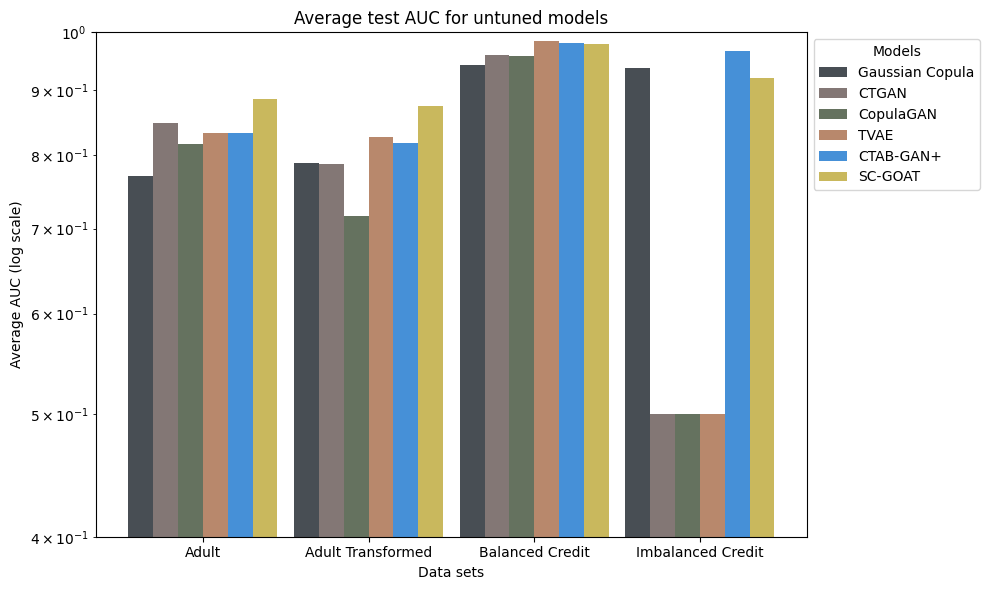

In [15]:
# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_subgroups):
    # Calculate the x-position for each subgroup
    subgroup_x_pos = x_pos + i * bar_width - (num_subgroups - 1) * bar_width / 2
    # Plot the bars for each subgroup using a different color
    ax.bar(subgroup_x_pos, [data_t[j][i] for j in range(num_groups)],
           width=bar_width, color=colors[i], alpha=0.8, label=subgroups[i])

# Add labels and legend
ax.set_xlabel('Data sets')
plt.ylabel("Average AUC (log scale)")
plt.title("Average test AUC for untuned models")
plt.ylim(0.4, 1)
plt.yscale('log')
ax.set_xticks(x_pos)
ax.set_xticklabels(groups)
ax.legend(title='Models', loc='upper left', bbox_to_anchor=(1, 1))


# Show the plot
plt.tight_layout()
plt.show() 

## Alphas

In [16]:
ldname = ['adult', 'balanced_credit_card', 'unbalanced_credit_card', 'encoded_adult']
lmethod = ['Gaussian Copula', 'CTGAN', 'CopulaGAN', 'TVAE']
dfres = pd.DataFrame()
outpath = "../data/outputDataAugmentation/"
lres = []
n_exp = 10
for exp in range(n_exp):
    for data in ldname:
        fname_u = outpath + 'experiment' + str(exp) + "_" + data + "_untuned__models_clf_best_param_xgboost.csv"
        fname_t = outpath + 'experiment' + str(exp) + "_" + data + "_tuned__models_clf_best_param_xgboost.csv"
        if not os.path.exists(fname_u):
            print(f"File '{fname_u}' does not exist. Skipping...")
            continue
        df_u = pd.read_csv(fname_u)
        df_t = pd.read_csv(fname_t)
        lalpha_u = df_u.loc[:, ['alpha_1', 'alpha_2', 'alpha_3', 'alpha_4']].T[0].to_list()
        lalpha_t = df_t.loc[:, ['alpha_1', 'alpha_2', 'alpha_3', 'alpha_4']].T[0].to_list()
        dft = pd.DataFrame({'data': data, 'method': lmethod, 'experiment': exp, 'tuned_alpha': lalpha_u, 'untuned_alpha':lalpha_t})
        lres.append(dft)
dfres = pd.concat(lres)

In [17]:
dfres = dfres.groupby(['data', 'method']).mean()
dfres[['tuned_alpha', 'untuned_alpha']].to_csv("../Results/mean_alpha.csv")
dfres

experiment  tuned_alpha  untuned_alpha
data                   method                                                 
adult                  CTGAN                   4.5     0.394612       0.368394
                       CopulaGAN               4.5     0.194747       0.177182
                       Gaussian Copula         4.5     0.202028       0.223963
                       TVAE                    4.5     0.208614       0.230461
balanced_credit_card   CTGAN                   4.5     0.078896       0.034418
                       CopulaGAN               4.5     0.077611       0.080917
                       Gaussian Copula         4.5     0.281435       0.331745
                       TVAE                    4.5     0.562058       0.552920
encoded_adult          CTGAN                   4.5     0.336619       0.237071
                       CopulaGAN               4.5     0.074558       0.193309
                       Gaussian Copula         4.5     0.275155       0.340717
                       TVAE                    4.5     0.313667       0.228903
unbalanced_credit_card CTGAN                   4.5     0.222490       0.256709
                       CopulaGAN               4.5     0.027369       0.013192
                       Gaussian Copula         4.5     0.535823       0.593241
                       TVAE                    4.5     0.214319       0.136858

In [18]:
dfres.groupby(['data']).sum()

,experiment,tuned_alpha,untuned_alpha
data,,,
adult,18.0,1.0,1.0
balanced_credit_card,18.0,1.0,1.0
encoded_adult,18.0,1.0,1.0
unbalanced_credit_card,18.0,1.0,1.0


## Proportions

In [19]:


ldname = ['adult', 'balanced_credit_card', 'unbalanced_credit_card', 'encoded_adult']
lmethod = ['GaussianCopula', 'CTGAN', 'CopulaGAN', 'TVAE']
dfres = pd.DataFrame()
outpath = "../data/output/ES10HP2/"
lres = []
n_exp = 10
for method in lmethod:
    for data in ldname:
        fname_u = outpath + data + '_untuned_' + method +  "_synthetic_data_xgboost.csv"
        fname_t = outpath + data + '_tuned_' + method +  "_synthetic_data_xgboost.csv"
        if not os.path.exists(fname_u):
            print(f"File '{fname_u}' does not exist. Skipping...")
            continue
        df_u = pd.read_csv(fname_u)
        df_t = pd.read_csv(fname_t)
        N = df_t.shape[0]
        if (data == 'balanced_credit_card') or (data == 'unbalanced_credit_card'):
            target = 'Class'
            n0u = sum(df_u[target] == 0)
            n1u = sum(df_u[target] == 1)
            n0t = sum(df_t[target] == 0)
            n1t = sum(df_t[target] == 1)
        else:
            target = 'income'
            n0u = sum(df_u[target] == 0)
            n1u = sum(df_u[target] == 1)
            n0t = sum(df_t[target] == 0)
            n1t = sum(df_t[target] == 1)
        
        lres.append([data, method, n0u/N, n1u/N, n0t/N, n1t/N])
dfres = pd.DataFrame(lres, columns=['data', 'method', 'untuned:class0', 'untuned:class1', 'tuned:class0', 'tuned:class1'])

In [20]:
dfres.sort_values(by = ['data', 'method']).to_csv('../Results/proportions.csv')


In [32]:
ldname = ['adult', 'balanced_credit_card', 'unbalanced_credit_card', 'encoded_adult']
lmethod = ['Gaussian Copula', 'CTGAN', 'CopulaGAN', 'TVAE']
dfres = pd.DataFrame()
outpath = "../data/outputDataAugmentation/"
lres = []
n_exp = 10

for exp in range(n_exp):
    for data in ldname:
        fname_u = outpath + 'experiment' + str(exp) + "_" + data + "_untuned_models_synthetic_data_xgboost.csv"
        fname_t = outpath + 'experiment' + str(exp) + "_" + data + "_tuned_models_synthetic_data_xgboost.csv"
        if not os.path.exists(fname_u):
            print(f"File '{fname_u}' does not exist. Skipping...")
            continue
        df_u = pd.read_csv(fname_u)
        df_t = pd.read_csv(fname_t)
        N = df_t.shape[0]
        if (data == 'balanced_credit_card') or (data == 'unbalanced_credit_card'):
            target = 'Class'
            n0u = sum(df_u[target] == 0)
            n1u = sum(df_u[target] == 1)
            n0t = sum(df_t[target] == 0)
            n1t = sum(df_t[target] == 1)
        else:
            target = 'income'
            n0u = sum(df_u[target] == ' <=50K')
            n1u = sum(df_u[target] == ' >50K')
            n0t = sum(df_t[target] == ' <=50K')
            n1t = sum(df_t[target] == ' >50K')

        lres.append([data, n0u/N, n1u/N, n0t/N, n1t/N, exp])
dfres = pd.DataFrame(lres, columns=['data', 'untuned:class0', 'untuned:class1', 'tuned:class0', 'tuned:class1', 'experiment'])
dfres

,data,untuned:class0,untuned:class1,tuned:class0,tuned:class1,experiment
0,adult,0.8228,0.1772,0.7534,0.2466,0
1,balanced_credit_card,0.7329,0.2671,0.6696,0.3304,0
2,unbalanced_credit_card,0.9958,0.0042,0.9983,0.0017,0
3,encoded_adult,0.7352,0.2648,0.8087,0.1913,0
4,adult,0.7552,0.2448,0.8079,0.1921,1
5,balanced_credit_card,0.7796,0.2204,0.7588,0.2412,1
6,unbalanced_credit_card,0.9892,0.0108,0.9970,0.0030,1
7,encoded_adult,0.7359,0.2641,0.7967,0.2033,1
8,adult,0.7331,0.2669,0.7961,0.2039,2
9,balanced_credit_card,0.7623,0.2377,0.7081,0.2919,2


In [33]:
dfres = dfres.groupby(['data']).mean()
dfres[['untuned:class0', 'untuned:class1', 'tuned:class0', 'tuned:class1']].to_csv("../Results/propSC-GOAT.csv")
dfres[['untuned:class0', 'untuned:class1', 'tuned:class0', 'tuned:class1']]

,untuned:class0,untuned:class1,tuned:class0,tuned:class1
data,,,,
adult,0.78930,0.21070,0.78406,0.21594
balanced_credit_card,0.71781,0.28219,0.73672,0.26328
encoded_adult,0.75536,0.24464,0.78380,0.21620
unbalanced_credit_card,0.99605,0.00395,0.99694,0.00306


In [34]:
dfres.columns
df_u[target].unique()

array([' <=50K', ' >50K'], dtype=object)